<a href="https://colab.research.google.com/github/bradykuo/Wave-dataset-analysis/blob/main/wave_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import required libraries
## Data manipulation and analysis
import pandas as pd
import numpy as np
from scipy.io import arff

## Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Specify the paths of the ARFF files
arff_file1 = '/content/drive/MyDrive/Colab Notebooks/Wave Dataset Analysis/wave_2_classes_with_irrelevant_attributes/wave_2_classes_with_irrelevant_attributes.train.arff'
arff_file2 = '/content/drive/MyDrive/Colab Notebooks/Wave Dataset Analysis/wave_2_classes_with_irrelevant_attributes/wave_2_classes_with_irrelevant_attributes.test.arff'

# Use the arff package to load the ARFF files
data1, meta1 = arff.loadarff(arff_file1)
data2, meta2 = arff.loadarff(arff_file2)

# Convert ARFF data to Pandas DataFrame
X_train = pd.DataFrame.from_records(data1)
X_test = pd.DataFrame.from_records(data2)

# Extract the target variable
y_train = X_train.pop('classe')
y_test = X_test.pop('classe')

# Perform binary classification by selecting one class as positive
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


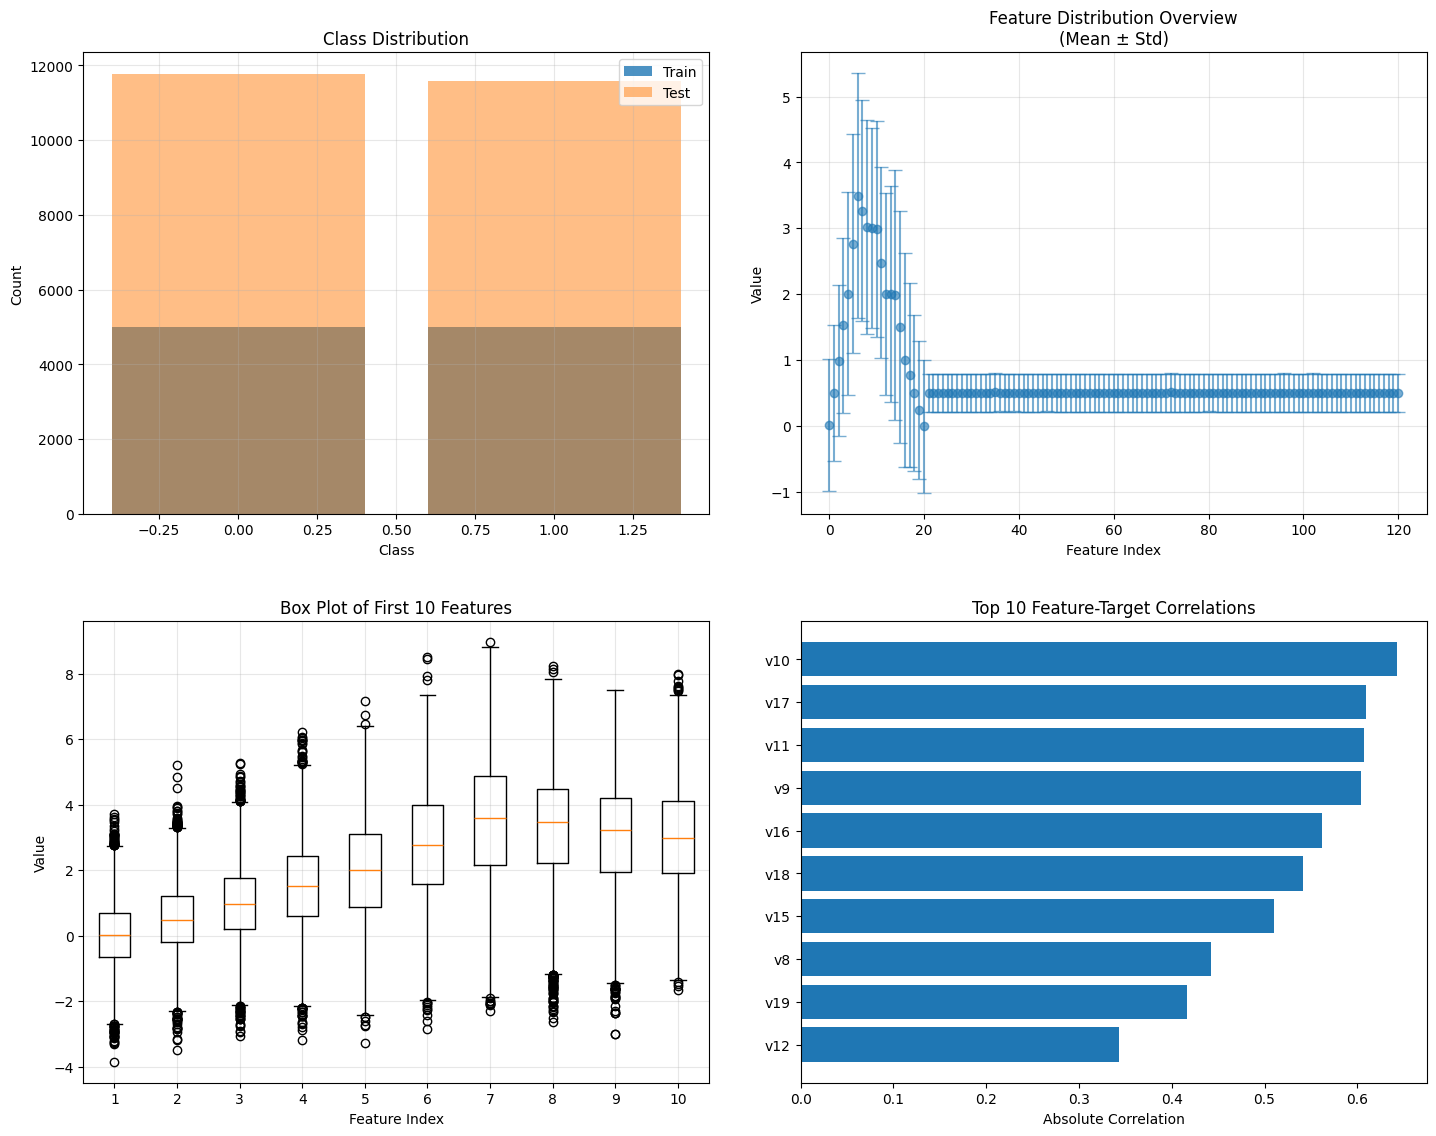


Data Summary:
Number of training samples: 10000
Number of testing samples: 23334
Number of features: 121

Class Distribution:
Class 0: 5006 samples (50.06%)
Class 1: 4994 samples (49.94%)


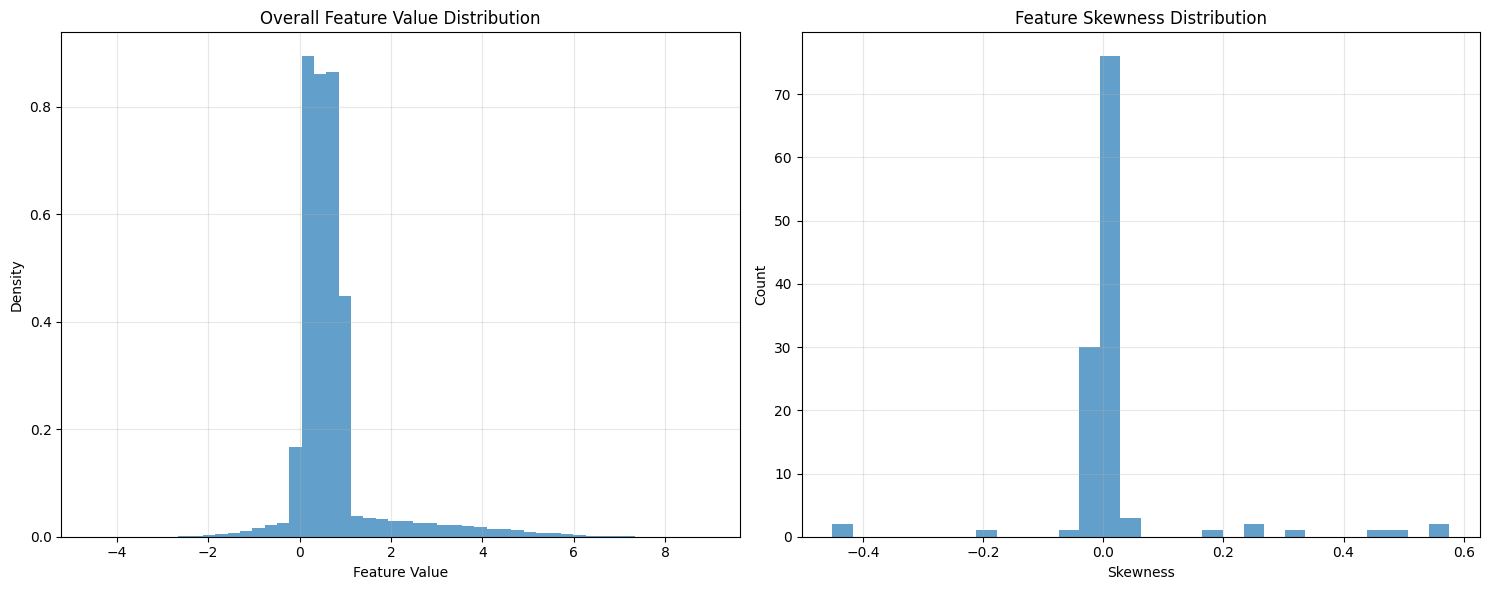

In [ ]:
# Create figure with subplots
fig = plt.figure(figsize=(15, 12))

# 1. Class Distribution (Top Left)
plt.subplot(2, 2, 1)
unique_classes, train_counts = np.unique(y_train, return_counts=True)
plt.bar(unique_classes, train_counts, alpha=0.8, label='Train')
unique_classes, test_counts = np.unique(y_test, return_counts=True)
plt.bar(unique_classes, test_counts, alpha=0.5, label='Test')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Feature Distribution Overview (Top Right)
plt.subplot(2, 2, 2)
# Calculate mean values for each feature
train_means = X_train.mean()
train_std = X_train.std()

plt.errorbar(range(len(train_means)),
            train_means,
            yerr=train_std,
            fmt='o',
            capsize=5,
            alpha=0.6)
plt.title('Feature Distribution Overview\n(Mean ± Std)')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

# 3. Box Plot of Features (Bottom Left)
plt.subplot(2, 2, 3)
# Select first 10 features for clarity
data_to_plot = X_train.iloc[:, :10]
plt.boxplot(data_to_plot)
plt.title('Box Plot of First 10 Features')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.xticks(range(1, 11))
plt.grid(True, alpha=0.3)

# 4. Feature Correlation with Target (Bottom Right)
plt.subplot(2, 2, 4)
correlations = []
for column in X_train.columns:
    corr = np.corrcoef(X_train[column], y_train)[0,1]
    correlations.append(abs(corr))

# Sort correlations for better visualization
sorted_idx = np.argsort(correlations)[-10:]  # Top 10 correlations
plt.barh(range(10), np.array(correlations)[sorted_idx])
plt.yticks(range(10), X_train.columns[sorted_idx])
plt.title('Top 10 Feature-Target Correlations')
plt.xlabel('Absolute Correlation')

plt.tight_layout(pad=3.0)
plt.show()

# Print summary statistics
print("\nData Summary:")
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of features: {X_train.shape[1]}")
print("\nClass Distribution:")
for cls, count in zip(unique_classes, train_counts):
    print(f"Class {cls}: {count} samples ({count/len(y_train)*100:.2f}%)")

# Additional distribution analysis
plt.figure(figsize=(15, 6))

# 5. Feature Value Distribution
plt.subplot(1, 2, 1)
all_values = X_train.values.flatten()
plt.hist(all_values, bins=50, density=True, alpha=0.7)
plt.title('Overall Feature Value Distribution')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)

# 6. Feature Skewness Analysis
plt.subplot(1, 2, 2)
skewness = []
for column in X_train.columns:
    skew = stats.skew(X_train[column])
    skewness.append(skew)

plt.hist(skewness, bins=30, alpha=0.7)
plt.title('Feature Skewness Distribution')
plt.xlabel('Skewness')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Machine Learning Model Categories

## 1. Linear Models
### Currently Used:
- LogisticRegression
- LinearSVC
- LinearRegression

### Additional Options:
- Ridge (L2 regularization)
- Lasso (L1 regularization)
- ElasticNet (Combined L1 & L2)
- SGDClassifier
- LDA (Linear Discriminant Analysis)

## 2. Tree-Based Models
### Currently Used:
- RandomForest

### Additional Options:
- Decision Tree
- XGBoost
- LightGBM
- CatBoost
- AdaBoost
- Gradient Boosting (GradientBoostingClassifier)

## 3. SVM Variants
### Currently Used:
- LinearSVC

### Additional Options:
- SVC with different kernels:
  - RBF
  - Polynomial
  - Sigmoid
- NuSVC
- SVR (for regression)

## 4. Neural Networks
### Available Options:
- MLPClassifier (Multi-layer Perceptron)
- MLPRegressor
- Keras/TensorFlow models

---

### Usage Notes:
1. Linear Models are good for:
   - Simple, interpretable results
   - High-dimensional data
   - Sparse datasets

2. Tree-Based Models excel at:
   - Non-linear relationships
   - Feature importance analysis
   - Handling mixed data types

3. SVM Variants are suitable for:
   - High-dimensional spaces
   - Cases where number of dimensions is greater than samples
   - Complex decision boundaries

4. Neural Networks are best for:
   - Complex patterns
   - Large datasets
   - Deep learning applications


Linear SVC Model Performance Metrics:
Accuracy:  0.9200
Precision: 0.9204
Recall:    0.9200
F1-score:  0.9200


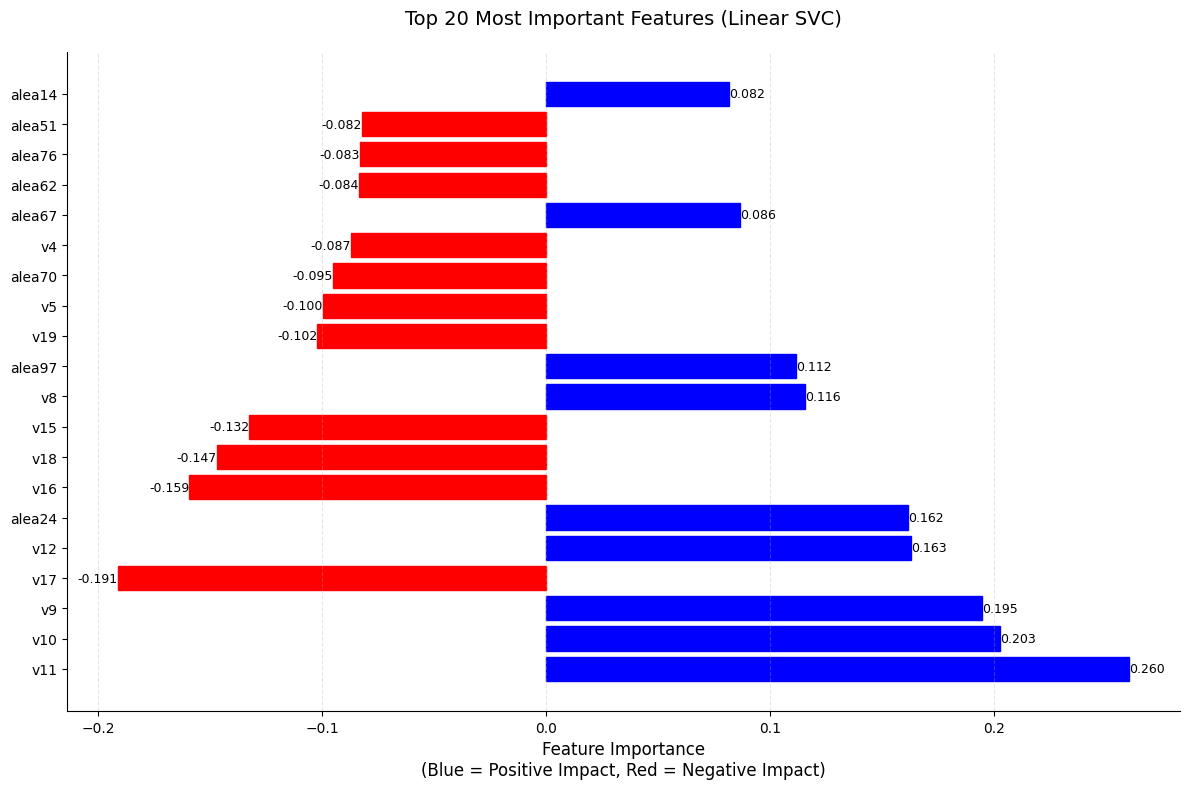

In [ ]:
# Define the prediction model
model = LinearSVC(penalty='l2')

# Split the data into training and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train_split, y_train_split)

# Calculate feature importances
feature_importances = model.coef_[0]

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Calculate absolute importance for sorting
importance_df['Abs_Importance'] = abs(importance_df['Importance'])

# Sort by absolute importance and get top 20 features
top_features = importance_df.nlargest(20, 'Abs_Importance')

# Create the visualization
plt.figure(figsize=(12, 8))

# Create horizontal bar plot
bars = plt.barh(range(len(top_features)), top_features['Importance'])

# Add feature names as y-tick labels
plt.yticks(range(len(top_features)), top_features['Feature'], fontsize=10)

# Color code bars based on positive/negative importance
colors = ['red' if x < 0 else 'blue' for x in top_features['Importance']]
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add value labels on the bars
for i, v in enumerate(top_features['Importance']):
    plt.text(v, i, f'{v:.3f}',
            va='center',
            ha='left' if v >= 0 else 'right',
            fontsize=9)

# Customize plot
plt.title('Top 20 Most Important Features (Linear SVC)', fontsize=14, pad=20)
plt.xlabel('Feature Importance\n(Blue = Positive Impact, Red = Negative Impact)', fontsize=12)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()

# Make predictions and calculate metrics
y_pred = model.predict(X_test_split)

accuracy1 = accuracy_score(y_test_split, y_pred)
precision = precision_score(y_test_split, y_pred, average='weighted')
recall = recall_score(y_test_split, y_pred, average='weighted')
f1 = f1_score(y_test_split, y_pred, average='weighted')

# Print metrics
print("\nLinear SVC Model Performance Metrics:")
print(f"Accuracy:  {accuracy1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

# Show the plot
plt.show()


Logistic Regression Model Performance Metrics:
Accuracy:  0.9215
Precision: 0.9219
Recall:    0.9215
F1-score:  0.9215


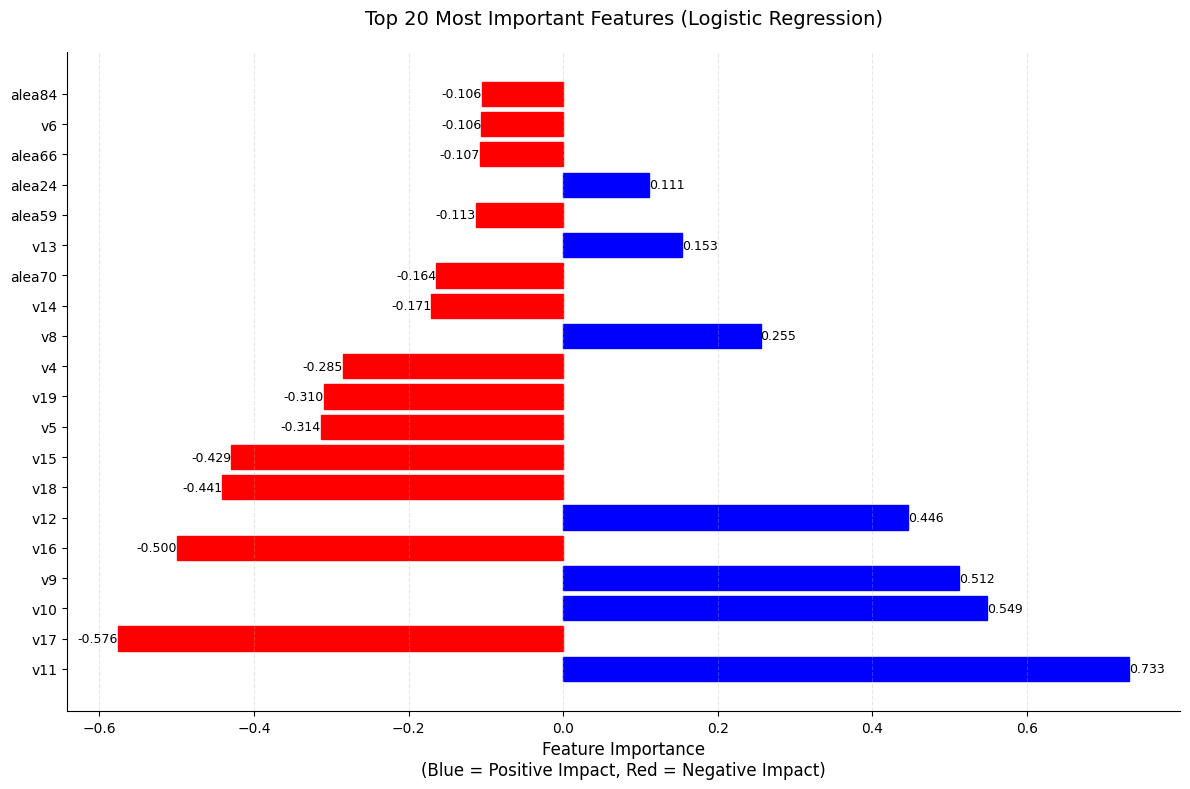

In [ ]:
# Define the prediction model
model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)  # L1 regularization with strong penalty

# Split the data into training and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train_split, y_train_split)

# Calculate feature importances
feature_importances = model.coef_[0]

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Calculate absolute importance for sorting
importance_df['Abs_Importance'] = abs(importance_df['Importance'])

# Sort by absolute importance and get top 20 features
top_features = importance_df.nlargest(20, 'Abs_Importance')

# Create the visualization
plt.figure(figsize=(12, 8))

# Create horizontal bar plot
bars = plt.barh(range(len(top_features)), top_features['Importance'])

# Add feature names as y-tick labels
plt.yticks(range(len(top_features)), top_features['Feature'], fontsize=10)

# Color code bars based on positive/negative importance
colors = ['red' if x < 0 else 'blue' for x in top_features['Importance']]
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add value labels on the bars
for i, v in enumerate(top_features['Importance']):
    plt.text(v, i, f'{v:.3f}',
            va='center',
            ha='left' if v >= 0 else 'right',
            fontsize=9)

# Customize plot
plt.title('Top 20 Most Important Features (Logistic Regression)', fontsize=14, pad=20)
plt.xlabel('Feature Importance\n(Blue = Positive Impact, Red = Negative Impact)', fontsize=12)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()

# Make predictions and calculate metrics
y_pred = model.predict(X_test_split)

accuracy2 = accuracy_score(y_test_split, y_pred)
precision = precision_score(y_test_split, y_pred, average='weighted')
recall = recall_score(y_test_split, y_pred, average='weighted')
f1 = f1_score(y_test_split, y_pred, average='weighted')

# Print metrics
print("\nLogistic Regression Model Performance Metrics:")
print(f"Accuracy:  {accuracy2:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

# Show the plot
plt.show()


Linear Discriminant Analysis (LDA) Performance Metrics:
Accuracy:  0.9180
Precision: 0.9189
Recall:    0.9180
F1-score:  0.9180

Explained Variance Ratio: [1.]


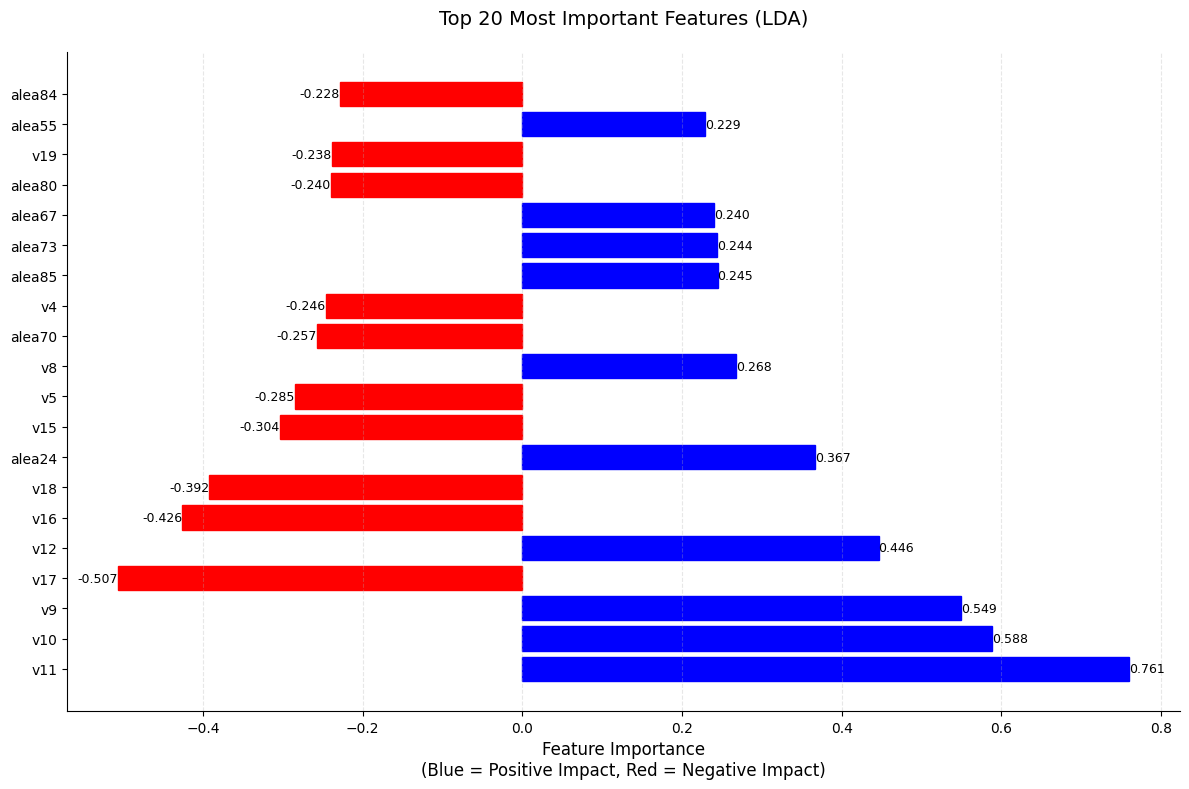

In [ ]:
# Define the prediction model
model = LinearDiscriminantAnalysis()

# Split the data into training and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train_split, y_train_split)

# Calculate feature importances (coefficients)
feature_importances = model.coef_[0]

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Calculate absolute importance for sorting
importance_df['Abs_Importance'] = abs(importance_df['Importance'])

# Sort by absolute importance and get top 20 features
top_features = importance_df.nlargest(20, 'Abs_Importance')

# Create the visualization
plt.figure(figsize=(12, 8))

# Create horizontal bar plot
bars = plt.barh(range(len(top_features)), top_features['Importance'])

# Add feature names as y-tick labels
plt.yticks(range(len(top_features)), top_features['Feature'], fontsize=10)

# Color code bars based on positive/negative importance
colors = ['red' if x < 0 else 'blue' for x in top_features['Importance']]
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add value labels on the bars
for i, v in enumerate(top_features['Importance']):
    plt.text(v, i, f'{v:.3f}',
            va='center',
            ha='left' if v >= 0 else 'right',
            fontsize=9)

# Customize plot
plt.title('Top 20 Most Important Features (LDA)', fontsize=14, pad=20)
plt.xlabel('Feature Importance\n(Blue = Positive Impact, Red = Negative Impact)', fontsize=12)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()

# Make predictions and calculate metrics
y_pred = model.predict(X_test_split)

accuracy3 = accuracy_score(y_test_split, y_pred)
precision = precision_score(y_test_split, y_pred, average='weighted')
recall = recall_score(y_test_split, y_pred, average='weighted')
f1 = f1_score(y_test_split, y_pred, average='weighted')

# Print metrics
print("\nLinear Discriminant Analysis (LDA) Performance Metrics:")
print(f"Accuracy:  {accuracy3:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

# Optional: Print explained variance ratio
if hasattr(model, 'explained_variance_ratio_'):
    print("\nExplained Variance Ratio:", model.explained_variance_ratio_)

# Optional: Add discriminant analysis visualization
try:
    # Transform the data
    X_transformed = model.transform(X_test_split)

    # Create scatter plot of first two discriminants if available
    if X_transformed.shape[1] >= 2:
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1],
                            c=y_test_split, cmap='viridis', alpha=0.6)
        plt.colorbar(scatter)
        plt.title('LDA Transformation - First Two Discriminants')
        plt.xlabel('First Discriminant')
        plt.ylabel('Second Discriminant')
        plt.grid(True, alpha=0.3)
        plt.show()
except:
    pass

# Show the main feature importance plot
plt.show()


Random Forest Model Performance Metrics:
Accuracy:  0.9125
Precision: 0.9138
Recall:    0.9125
F1-score:  0.9125


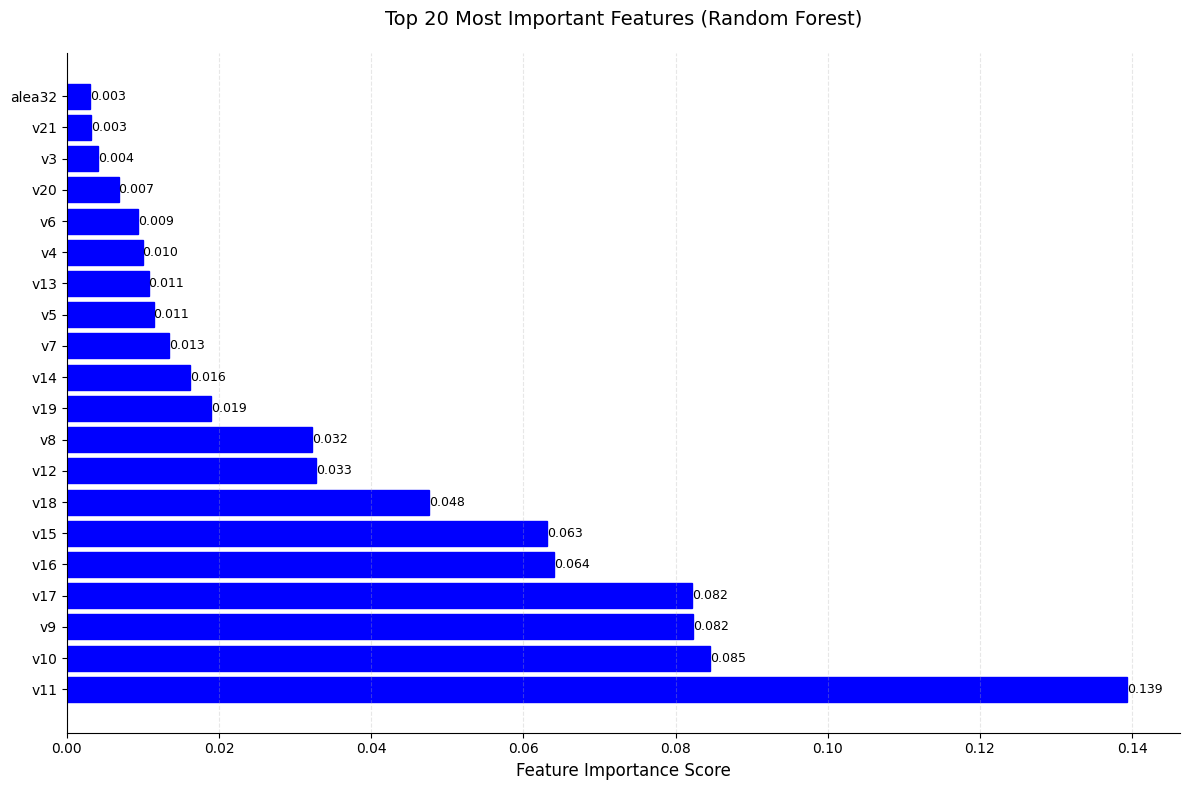

In [ ]:
# Define and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Split the data into training and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Train the model
model.fit(X_train_split, y_train_split)

# Calculate feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort by importance and get top 20 features
top_features = importance_df.nlargest(20, 'Importance')

# Create visualization
plt.figure(figsize=(12, 8))

# Create horizontal bar plot
bars = plt.barh(range(len(top_features)), top_features['Importance'])

# Add feature names as y-tick labels
plt.yticks(range(len(top_features)), top_features['Feature'], fontsize=10)

# Color all bars blue since Random Forest importances are always positive
for bar in bars:
    bar.set_color('blue')

# Add value labels on the bars
for i, v in enumerate(top_features['Importance']):
    plt.text(v, i, f'{v:.3f}',
            va='center',
            ha='left',
            fontsize=9)

# Customize plot
plt.title('Top 20 Most Important Features (Random Forest)', fontsize=14, pad=20)
plt.xlabel('Feature Importance Score', fontsize=12)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()

# Make predictions and calculate metrics
y_pred = model.predict(X_test_split)

accuracy4 = accuracy_score(y_test_split, y_pred)
precision = precision_score(y_test_split, y_pred, average='weighted')
recall = recall_score(y_test_split, y_pred, average='weighted')
f1 = f1_score(y_test_split, y_pred, average='weighted')

# Print metrics
print("\nRandom Forest Model Performance Metrics:")
print(f"Accuracy:  {accuracy4:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

# Show the plot
plt.show()


XGBoost Model Performance Metrics:
Accuracy:  0.9140
Precision: 0.9147
Recall:    0.9140
F1-score:  0.9140


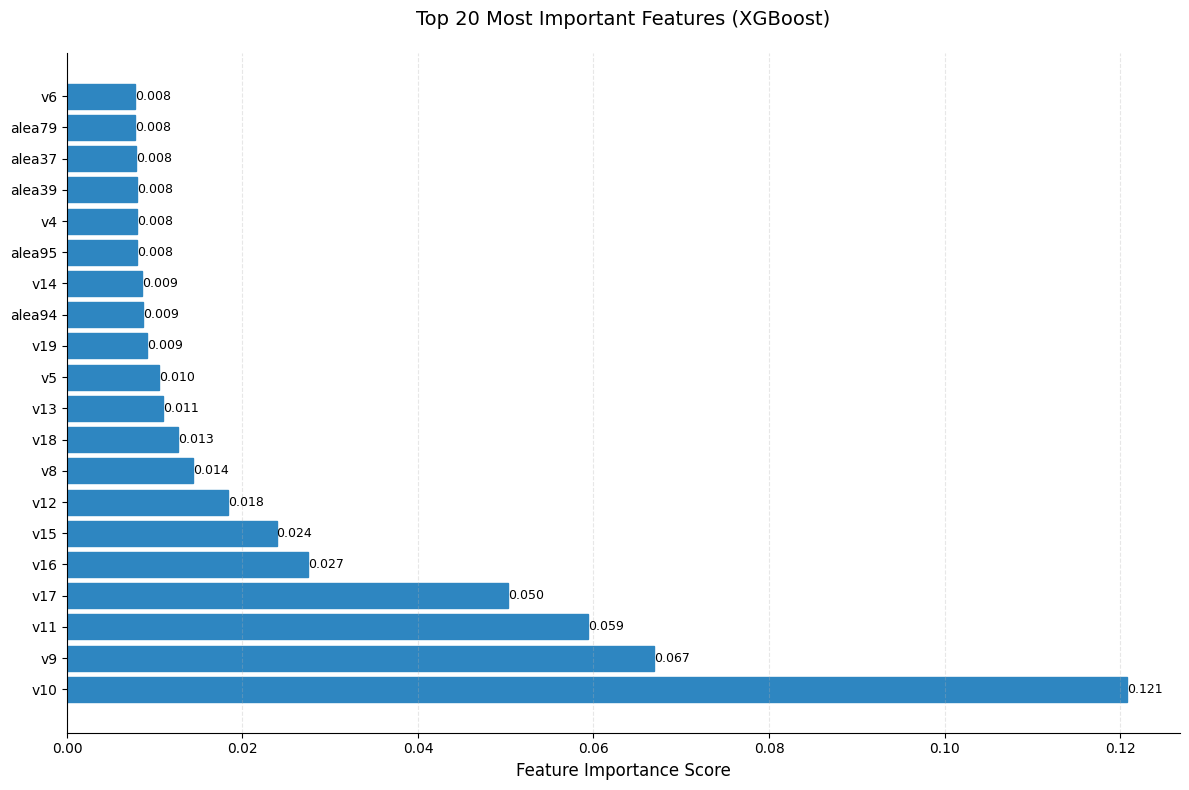

In [ ]:
# Define and train model
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'  # Moved eval_metric to model initialization
)

# Split the data into training and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Train the model with simplified parameters
model.fit(
    X_train_split,
    y_train_split,
    eval_set=[(X_test_split, y_test_split)],
    verbose=False
)

# Calculate feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort by importance and get top 20 features
top_features = importance_df.nlargest(20, 'Importance')

# Create visualization
plt.figure(figsize=(12, 8))

# Create horizontal bar plot
bars = plt.barh(range(len(top_features)), top_features['Importance'])

# Add feature names as y-tick labels
plt.yticks(range(len(top_features)), top_features['Feature'], fontsize=10)

# Use a different blue color for XGBoost
xgb_color = '#2E86C1'
for bar in bars:
    bar.set_color(xgb_color)

# Add value labels on the bars
for i, v in enumerate(top_features['Importance']):
    plt.text(v, i, f'{v:.3f}',
            va='center',
            ha='left',
            fontsize=9)

# Customize plot
plt.title('Top 20 Most Important Features (XGBoost)', fontsize=14, pad=20)
plt.xlabel('Feature Importance Score', fontsize=12)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()

# Make predictions and calculate metrics
y_pred = model.predict(X_test_split)

accuracy5 = accuracy_score(y_test_split, y_pred)
precision = precision_score(y_test_split, y_pred, average='weighted')
recall = recall_score(y_test_split, y_pred, average='weighted')
f1 = f1_score(y_test_split, y_pred, average='weighted')

# Print metrics
print("\nXGBoost Model Performance Metrics:")
print(f"Accuracy:  {accuracy5:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

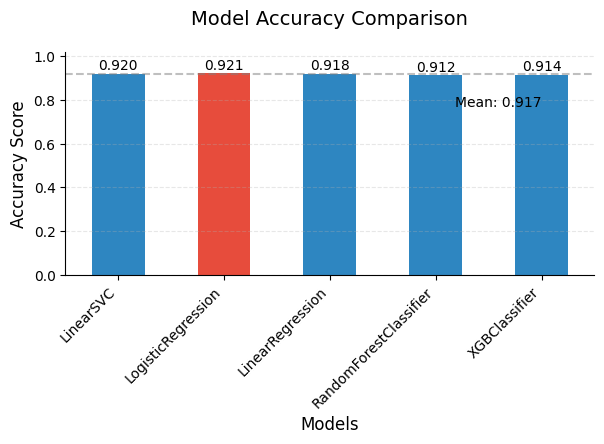


Statistical Summary:
Best Model: LogisticRegression (Accuracy: 0.921)
Mean Accuracy: 0.917
Std Deviation: 0.004

Model Rankings:
               Metrics  Scores
    LogisticRegression  0.9215
             LinearSVC  0.9200
      LinearRegression  0.9180
         XGBClassifier  0.9140
RandomForestClassifier  0.9125


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create DataFrame with results
results = pd.DataFrame({
    'Metrics': ['LinearSVC', 'LogisticRegression', 'LinearRegression',
                'RandomForestClassifier', 'XGBClassifier'],
    'Scores': [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]
})

# Set figure size
plt.figure(figsize=(12, 8))

# Create bar plot
ax = results.plot.bar(x='Metrics', y='Scores', legend=False)

# Find best model for coloring
max_score = results['Scores'].max()
max_model = results[results['Scores'] == max_score]['Metrics'].values[0]
index = results[results['Metrics'] == max_model].index[0]

# Color coding
colors = ['#2E86C1'] * len(results)  # Default blue color
colors[index] = '#E74C3C'  # Red color for best model

# Apply colors to bars
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i])

# Add value labels on top of each bar
for i, v in enumerate(results['Scores']):
    ax.text(i, v + 0.005,
            f'{v:.3f}',
            ha='center',
            va='bottom')

# Adjust y-axis limits to prevent overlap
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax + 0.05)

# Customize plot
plt.title('Model Accuracy Comparison', fontsize=14, pad=20)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add mean accuracy line and text
mean_accuracy = results['Scores'].mean()
plt.axhline(y=mean_accuracy, color='gray', linestyle='--', alpha=0.5)
plt.annotate(f'Mean: {mean_accuracy:.3f}',
            xy=(len(results)-1, mean_accuracy),
            xytext=(0, -15),
            textcoords='offset points',
            va='top',
            ha='right')

# Adjust layout
plt.tight_layout(pad=2.0)

# Show plot
plt.show()

# Print statistical summary
print("\nStatistical Summary:")
print(f"Best Model: {max_model} (Accuracy: {max_score:.3f})")
print(f"Mean Accuracy: {mean_accuracy:.3f}")
print(f"Std Deviation: {results['Scores'].std():.3f}")
print("\nModel Rankings:")
print(results.sort_values('Scores', ascending=False).to_string(index=False))